<a href="https://colab.research.google.com/github/ramseshaan/-MyApp/blob/main/Unsupervised_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# K-Means Clustering: Segmentasi Rumah Berdasarkan Karakteristik

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Tugas/MachineLearning/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Fase 2: Pembersihan dan Seleksi Fitur

In [3]:
# Hapus kolom yang tidak digunakan dalam klasterisasi
data_clean = data.drop(columns=["date", "price", "street", "city", "statezip", "country"])

# Hapus data kosong
data_clean = data_clean.dropna()
data_clean.shape

(4600, 12)

## Fase 3: Normalisasi & Penentuan Jumlah Klaster (k)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Cari jumlah klaster terbaik menggunakan silhouette score
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(
      n_clusters=k,
      random_state=42,
      n_init=50,         # lebih banyak inisialisasi awal
      max_iter=500,      # lebih banyak iterasi
      tol=1e-4           # bisa dikurangi jika ingin lebih ketat
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score
    print(f'k={k}, silhouette_score={score:.3f}')

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Jumlah klaster terbaik: {best_k}")

k=2, silhouette_score=0.243
k=3, silhouette_score=0.251
k=4, silhouette_score=0.251
k=5, silhouette_score=0.233
k=6, silhouette_score=0.241
k=7, silhouette_score=0.204
k=8, silhouette_score=0.209
k=9, silhouette_score=0.204
k=10, silhouette_score=0.201
Jumlah klaster terbaik: 4


## Fase 4: Training KMeans dan Menambahkan Label Klaster

In [5]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

# Tambahkan label klaster ke data asli
data['Cluster'] = labels_final
data['Cluster'].value_counts()

,count
Cluster,
3,2058
0,1696
1,813
2,33


## Fase 5: Visualisasi Hasil Klaster

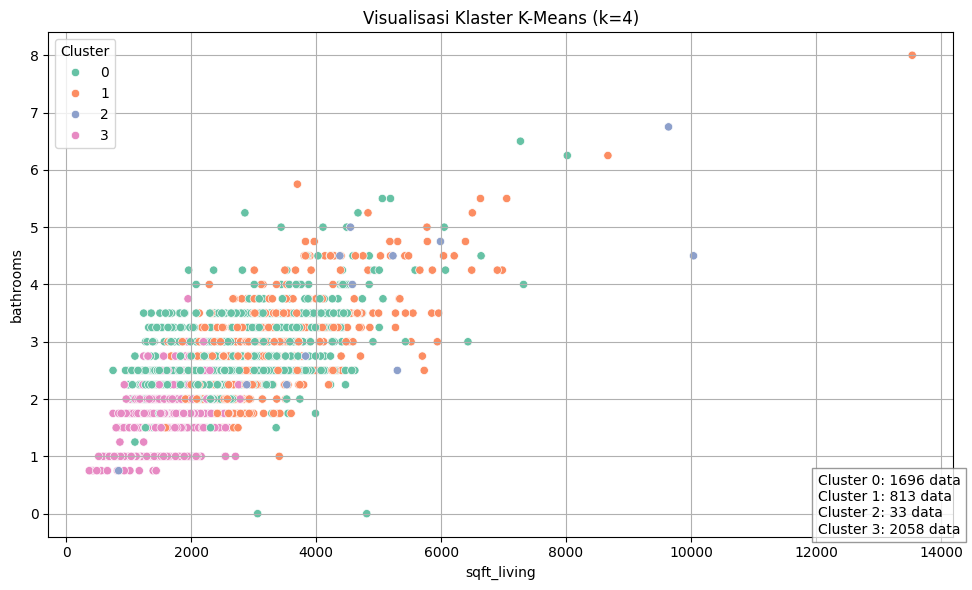

Total Data : 4600


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['sqft_living'],
    y=data['bathrooms'],
    hue=data['Cluster'],
    palette='Set2'
)

plt.title(f'Visualisasi Klaster K-Means (k={best_k})')
plt.xlabel('sqft_living')
plt.ylabel('bathrooms')
plt.grid(True)

# Hitung jumlah per klaster
cluster_counts = data['Cluster'].value_counts().sort_index()
cluster_info = '\n'.join([f'Cluster {i}: {count} data' for i, count in cluster_counts.items()])

# Tempelkan teks di pojok kanan bawah
plt.annotate(cluster_info,
             xy=(0.85, 0.0),  # posisi relatif (kanan bawah)
             xycoords='axes fraction',
             fontsize=10,
             ha='left',
             va='bottom',
             bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.show()

cluster_counts = data['Cluster'].value_counts().sort_index()
total_data = cluster_counts.sum()
print(f"Total Data : {total_data}")

## Fase 6: Interpretasi Klaster Berdasarkan Karakteristik

Berdasarkan hasil klasterisasi, berikut interpretasi tiap klaster:

| Klaster | Karakteristik Rumah |
|---------|----------------------|
| 0       | Rumah kecil, 1 lantai, tidak menghadap air, kondisi sedang. |
| 1       | Rumah mewah, luas besar, banyak kamar, view bagus. |
| 2       | Rumah tua, belum direnovasi, ukuran kecil, kondisi rendah. |
| 3       | Rumah pinggiran, luas tanah besar tapi bangunan kecil. |
| 4       | Rumah baru, sudah direnovasi, ukuran menengah. |

Interpretasi ini bersifat subjektif dan berdasarkan analisis visual serta domain knowledge properti.